# Data Merging Basics

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

## What column to merge on?
Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle. Both the taxi_owners and taxi_veh tables have been loaded for you to explore.

Choose the column you would use to merge the two tables on using the .merge() method.
### Solution
- "vid" in taxi_veh and "vid" in taxi_owners

## Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the taxi_owners and taxi_veh DataFrames are loaded for you.
### Instructions
 - Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.

In [4]:
# Import pandas as pd
import pandas as pd
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [5]:
# Load the taxi_owners and taxi_veh DataFrames
taxi_owners = pd.read_csv('../data/taxi_owners.csv')
taxi_veh = pd.read_csv('../data/taxi_veh.csv')

In [6]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


- Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.

In [7]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid',
                                 suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


- Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

In [8]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID        2782
GASOLINE       609
FLEX FUEL       85
COMPRESSED      27
HYBR             1
Name: count, dtype: int64


## Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.
### Instructions
- Merge wards and census on the ward column and save the result to wards_census.

In [9]:
# Load the wards and census DataFrames
wards = pd.read_csv('../data/wards.csv')
census = pd.read_csv('../data/census.csv')

In [10]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)


wards_census table shape: (50, 11)


- Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.

In [11]:
# Print the first few rows of the wards_altered table to view the change
wards_altered = wards.copy()
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

   ward
0     1
1     2
2     3
3     4
4     5
wards_altered_census table shape: (50, 11)


- Merge the wards and census_altered tables on the ward column, and notice the difference in returned rows

In [12]:
# Print the first few rows of the census_altered table to view the change
census_altered = census.copy()
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

   ward
0     1
1     2
2     3
3     4
4     5
wards_census_altered table shape: (50, 11)


## One-to-many relationships

## One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

The licenses and biz_owners DataFrames are loaded for you.
### Instructions
 - Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
 - Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
 - Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
 - Use the .head() method to print the first few rows of the sorted_df.

In [13]:
# Merge the licenses and biz_owners table on account
licenses = pd.read_csv('../data/licenses.csv')
biz_owners = pd.read_csv('../data/biz_owners.csv')
licenses_owners = licenses.merge(biz_owners, on='account')

In [14]:
# Group the results by title then count the number of accounts
licenses_owners = licenses.merge(biz_owners, on='account')
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6258
SECRETARY           5204
SOLE PROPRIETOR     1658
OTHER               1199
VICE PRESIDENT       969


## Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.
![Cla](../data/cta_L_diagram.png)
### Instructions
- Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.

In [15]:
# load the ridership and cal DataFrames
cal = pd.read_csv('../data/cal.csv')
stations = pd.read_csv('../data/stations.csv')
ridership = pd.read_csv('../data/ridership.csv')

# head of the DataFrames
print(stations.head())
print(cal.head())
print(ridership.head())

   station_id        station_name    location          NULL
0       40010  Austin-Forest Park  (41.870851   -87.776812)
1       40020         Harlem-Lake  (41.886848   -87.803176)
2       40030        Pulaski-Lake  (41.885412   -87.725404)
3       40040        Quincy/Wells  (41.878723    -87.63374)
4       40050               Davis   (42.04771   -87.683543)
   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
   station_id  year  month  day  rides
0       40010  2019      1    1    576
1       40010  2019      1    2   1457
2       40010  2019      1    3   1543
3       40010  2019      1    4   1621
4       40010  2019      1    5    719


In [16]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)

- Extend the previous merge to three tables by also merging the stations table.

In [17]:
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                .merge(stations.astype({'station_id': int}), on='station_id')

- Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.

In [18]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


## Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.
### Instructions
 - Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
 - Group the results of the three merged tables by the column alderman and find the median income.

In [19]:
# Load the zip_demo DataFrames
zip_demo = pd.read_csv('../data/zip_demo.csv')

In [20]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
	.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly              39179.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins Jr.      33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

## One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

The land_use, census, and licenses tables have been loaded for you.
### Instructions
- Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.

In [21]:
# Load the land_use DataFrame
land_use = pd.read_csv('../data/land_use.csv')

In [22]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

- Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.

In [23]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'],
                                   as_index=False).agg({'account':'count'})

- Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

In [24]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])

In [25]:
# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

    ward  pop_2010  vacant  account
6      7     51581      19       80
19    20     52372      15      123
9     10     51535      14      130
23    24     54909      13       98
15    16     51954      13      156


# Merging Tables With Different Join Types

## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.
### Instructions
- Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.

In [26]:
# Import the movies and financials DataFrames
movies = pd.read_csv('../data/movies.csv')
financials = pd.read_csv('../data/financials.csv')

In [27]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

- Count the number of rows in movies_financials with a null value in the budget column.

In [28]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

In [29]:
# Print the number of movies missing financials
print(number_of_missing_fin)

1574


## Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.
### Instructions
- Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.


In [30]:
# Load the toy_story and taglines DataFrames
toy_story = pd.read_csv('../data/toy_story.csv')
taglines = pd.read_csv('../data/taglines.csv')

In [31]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


- With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [32]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


# Other joins

## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.
### Instructions
- Merge scifi_movies and action_movies on the id column using a right join, and save

In [33]:
# Load the movies, scifi_movies, and action_movies DataFrames
movies = pd.read_csv('../data/movies.csv')
scifi_movies = pd.read_csv('../data/scifi_movies.csv')
action_movies = pd.read_csv('../data/action_movies.csv')

In [34]:
# Merge scifi_movies and action_movies on id using a right join
scifi_action = scifi_movies.merge(action_movies, on='movie_id', how='right')

- Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.

In [35]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


- From action_scifi, subset only the rows where the genre_act column is null.

In [36]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

- Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [37]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra       1.681   2001-09-12     18841   
1  26672     The Thief and the Cobbler       2.439   1993-09-23     26672   
2  15301      Twilight Zone: The Movie      12.900   1983-06-24     15301   
3   8452                   The 6th Day      18.450   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey      11.350   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


## Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movie_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.
### Instructions
- Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
- Group genres_movies by genre and count the number of id values.

In [38]:
# Load the pop_movies and movie_to_genres DataFrames
pop_movies = pd.read_csv('../data/pop_movies.csv')
movie_to_genres = pd.read_csv('../data/movie_to_genres.csv')

In [39]:
print(pop_movies.head())
print(movie_to_genres.head())

       id                    title  popularity release_date
0  211672                  Minions     875.581   2015-06-17
1  157336             Interstellar     724.248   2014-11-05
2  293660                 Deadpool     514.570   2016-02-09
3  118340  Guardians of the Galaxy     481.099   2014-07-30
4   76341       Mad Max: Fury Road     434.279   2015-05-13
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure


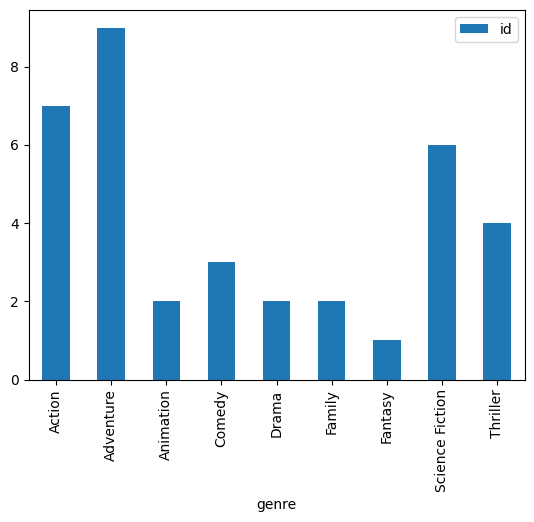

In [40]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

![outer_join](../data/noJoin.png)
### Instructions
- Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
- Create an index that returns True if name_1 or name_2 are null, and False otherwise.

In [41]:
# Load the iron_1_actors and iron_2_actors DataFrames
iron_1_actors = pd.read_csv('../data/iron_1_actors.csv')
iron_2_actors = pd.read_csv('../data/iron_2_actors.csv')

In [42]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=('_1', '_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) |
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id                           name_1  \
0                        Viper     1  1209419               Tim Rigby   
1                        Viper     2   195442      Russell Richardson   
2  Obadiah Stane / Iron Monger  1229                     Jeff Bridges   
3                          NaN  1245                              NaN   
4                          NaN  1896                              NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1                                               NaN                 NaN  
2                                               NaN                 NaN  
3  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  
4      Lt. Col. James "Rhodey" Rhodes / War Machine         Don Cheadle  


## Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.
### Instructions
- To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.

In [43]:
# Load the crews DataFrame
crews = pd.read_csv('../data/crews.csv')

In [44]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',suffixes=('_dir', '_crew'))

- Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.

In [45]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

- Use the .head() method to print the first few rows of direct_crews.

In [46]:
# Print the first few rows of direct_crews
print(direct_crews.head())

        id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays


# Merging on indexes

## Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

The movies and ratings tables have been loaded for you.
### Instructions
- Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.

In [47]:
# Load the movies and ratings DataFrames
ratings = pd.read_csv('../data/ratings.csv')

In [48]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist      20.420   2005-09-23           6.7   
1  14290  Better Luck Tomorrow       3.877   2002-01-12           6.5   
2  38365             Grown Ups      38.860   2010-06-24           6.0   
3   9672              Infamous       3.681   2006-11-16           6.4   
4  12819       Alpha and Omega      12.300   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels and financials tables have been provided.
### Instructions
- With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

In [49]:
# Load the sequels and financials DataFrames
sequels = pd.read_csv('../data/sequels.csv', index_col='id')
financials = pd.read_csv('../data/financials.csv', index_col='id')

In [50]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, left_index=True, right_index=True, how='left')

- Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

In [51]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, left_on='sequel', right_index=True,
                              how='inner', suffixes=('_org', '_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

- Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

In [52]:
# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

- Sort by titles_diff by diff in descending order and print the first few rows.

In [53]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff',ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.145200e+09
272        Batman Begins  The Dark Knight  6.308000e+08
10138         Iron Man 2       Iron Man 3  5.911000e+08
863          Toy Story 2      Toy Story 3  5.696000e+08
10764  Quantum of Solace          Skyfall  5.229000e+08


# Advanced Merging and Concatenating

## Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.
### Instructions
- Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

In [54]:
# Load the top_cust and employees DataFrames
top_cust = pd.read_csv('../data/top_cust.csv')
employees = pd.read_csv('../data/employees.csv')

In [55]:
# Merge employees and top_cust
empl_cust = employees.merge( top_cust, on='srid',
                            how='left' , indicator=True)

- Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.

In [56]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [57]:
# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


## Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.
### Instructions
- Merge `non_mus_tcks` and `top_invoices` on tid using an inner join. Save the result as tracks_invoices.
- Use .isin() to subset the rows of non_mus_tcks where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
- Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
- Merge cnt_by_gid with the genres table on gid and print the result.

In [58]:
# Load the non_mus_tcks, top_invoices, and genres DataFrames
non_mus_tcks = pd.read_csv('../data/non_mus_tcks.csv')
top_invoices = pd.read_csv('../data/top_invoices.csv')
genres = pd.read_csv('../data/genres.csv')

In [73]:
# Merge non_mus_tcks and top_invoices on 'tid' using an inner join
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid': 'count'})

# Merge cnt_by_gid with genres on gid and print the result
result = cnt_by_gid.merge(genres, on='gid')
print(result)


   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy
